In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Data

In [2]:
start = "2020-01-01"
end = "2021-10-01"

vx_df = yf.download("^VIX", start=start, end=end, auto_adjust=True)
vx_df.columns = vx_df.columns.get_level_values(0)

gc_df = yf.download("GC=F", start=start, end=end, auto_adjust=True)
gc_df.columns = gc_df.columns.get_level_values(0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Preprocessing

In [3]:
scaler = StandardScaler()
gc_df['Close_sc'] = scaler.fit_transform(gc_df[['Close']])
vx_df['Close_sc'] = scaler.fit_transform(vx_df[['Close']])

## Explore

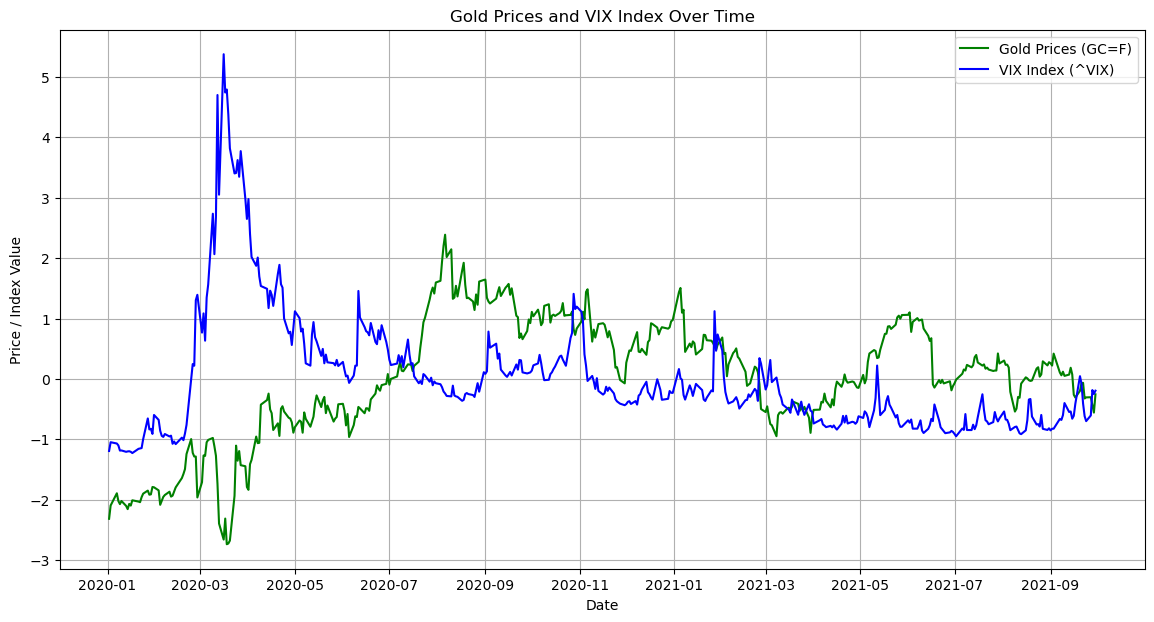

In [4]:
plt.figure(figsize=(14, 7))
plt.plot(gc_df.index, gc_df['Close_sc'], label='Gold Prices (GC=F)', color='green')
plt.plot(vx_df.index, vx_df['Close_sc'], label='VIX Index (^VIX)', color='blue')
plt.title('Gold Prices and VIX Index Over Time')
plt.xlabel('Date')
plt.ylabel('Price / Index Value')
plt.legend()
plt.grid()
plt.show()

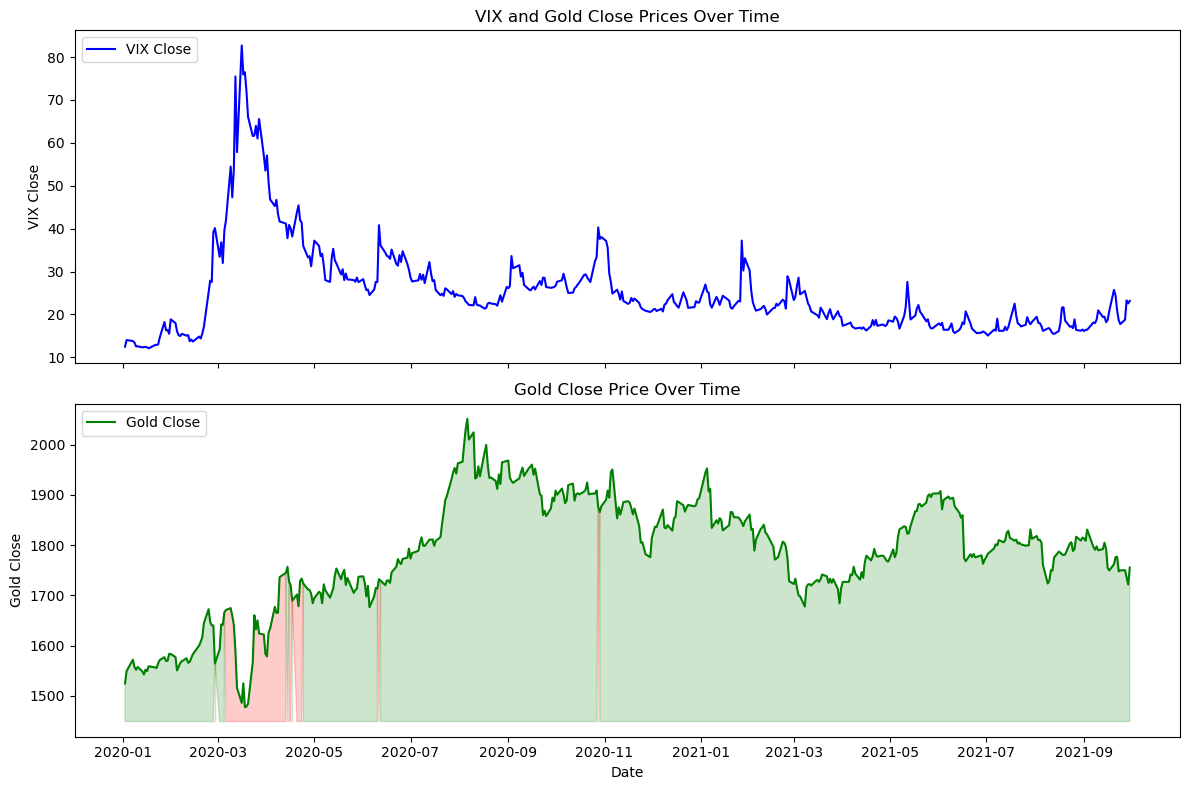

In [5]:
# ...existing code...
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# VIX subplot
ax[0].plot(vx_df.index, vx_df['Close'], label='VIX Close', color='blue')
ax[0].set_title('VIX and Gold Close Prices Over Time')
ax[0].set_ylabel('VIX Close')
ax[0].legend(loc='upper left')

# Gold subplot
ax[1].plot(gc_df.index, gc_df['Close'], label='Gold Close', color='green')

# Shade area on Gold: red when VIX Close >= 40, else green
vix_close_on_gc = vx_df['Close'].reindex(gc_df.index).ffill().bfill()
red_mask = vix_close_on_gc >= 40
ymin = ax[1].get_ylim()[0]
ax[1].fill_between(gc_df.index, gc_df['Close'], ymin, where=red_mask, color='red', alpha=0.2, interpolate=True)
ax[1].fill_between(gc_df.index, gc_df['Close'], ymin, where=~red_mask, color='green', alpha=0.2, interpolate=True)

ax[1].set_title('Gold Close Price Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Gold Close')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()
# ...existing code...